In [1]:
import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

##### Q1 - What is the best way to use groupby and pivot function on a pandas dataframe

groupby answers the question, for each category, summarise some numeric for that category 

In [2]:
drinks.groupby('continent').beer_servings.mean() # For each continent, we have the mean beer servings

continent
Africa            61.471698
Asia              37.045455
Europe           193.777778
North America    145.434783
Oceania           89.687500
South America    175.083333
Name: beer_servings, dtype: float64

We are grouping by continent and then selecting the beer_servings, we can get the mean

What we have done is for each continent what is the mean of the beer_serving series 

When do we use groupby?...When you have a question like 'for each continent, gender, etc.' ie when you want to know something about a group

##### Follow up - How to select multiple columns at once

In [3]:
drinks.groupby('continent').max()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,,
Africa,Zimbabwe,376,152,233,9.1
Asia,Yemen,247,326,123,11.5
Europe,United Kingdom,361,373,370,14.4
North America,USA,285,438,100,11.9
Oceania,Vanuatu,306,254,212,10.4
South America,Venezuela,333,302,221,8.3


If you leave out the column name ie beer_servings in the above example, then Pandas will do the operation for all the columns. For alphabetical columns, it simply gives you the last value alphabetically, so expect a lot of zed based answers

##### Q2

##### Append v Concat

concat - used when you have two df which have the same columns and you want to stack them on top of one another or they have the same rows and you want to stack them next to one another. KM never uses append

##### Merge v Join

don't use join always use merge

##### Pivot v Pivot Table v Cross Tab

Invest the most time in learning Pivot Table. You can achieve all the stuff in pivot and cross tab with it and then some

##### Stack v Unstack

unstack - KM uses it when he has a multi index and he wants to go to a regular index

In [4]:
drinks.groupby('continent').beer_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
Asia,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
Europe,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
North America,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
Oceania,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
South America,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


Takes you from this...to

In [5]:
drinks.groupby('continent').beer_servings.describe().unstack() # This is the multi/hierachical index

       continent    
count  Africa            53.000000
       Asia              44.000000
       Europe            45.000000
       North America     23.000000
       Oceania           16.000000
       South America     12.000000
mean   Africa            61.471698
       Asia              37.045455
       Europe           193.777778
       North America    145.434783
       Oceania           89.687500
       South America    175.083333
std    Africa            80.557816
       Asia              49.469725
       Europe            99.631569
       North America     79.621163
       Oceania           96.641412
       South America     65.242845
min    Africa             0.000000
       Asia               0.000000
       Europe             0.000000
       North America      1.000000
       Oceania            0.000000
       South America     93.000000
25%    Africa            15.000000
       Asia               4.250000
       Europe           127.000000
       North America     80.000000

In KM's example, the above command gave us the above and unstack gave us this. Pandas may have changed its default behaviour. But unstack will move the data around and change its shape

##### Q3 - Panel data: How to move from dataframe to panel data & vice versa

In [6]:
df = pd.DataFrame({'name':['A', 'A', 'B', 'B'], 'day':[1, 2, 1, 2], 'weight':[100, 103, 130,129], 'height':[67, 68, 72,72]})

We create a dataframe to illustrate making a df converting it to a panel and then back to a df. Below is what our df looks like...

In [7]:
df # Here is our dataframe

,day,height,name,weight
0,1,67,A,100
1,2,68,A,103
2,1,72,B,130
3,2,72,B,129


In [8]:
df.set_index(['name', 'day']) # To set a multi-index

height  weight
name day                
A    1        67     100
     2        68     103
B    1        72     130
     2        72     129

For each person, A & B, we are looking at the natural grouping. Using just A & B as the index you have this duplicate days/data. If you use day as the index then you get duplicate names. The most logical way to show the data is to group all person A's data together, ie for day 1 and day 2, and then to do the same for person B.

In [9]:
df.set_index(['name', 'day']).to_panel() # This is how we turn our dataset to a panel

c:\python36-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 2 (major_axis) x 2 (minor_axis)
Items axis: height to weight
Major_axis axis: A to B
Minor_axis axis: 1 to 2

In [10]:
df.set_index(['name', 'day']).to_panel().to_frame()

c:\python36-32\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


height  weight
name day                
A    1        67     100
     2        68     103
B    1        72     130
     2        72     129

###### Q4 - What is the most efficient way to identify outliers in a df
What is an outlier? - Decide what an outlier looks like. One method would be to write a bunch of filters, to filter the df looking for those particular cases. You might also use some sort of visualisation

In [11]:
%matplotlib inline


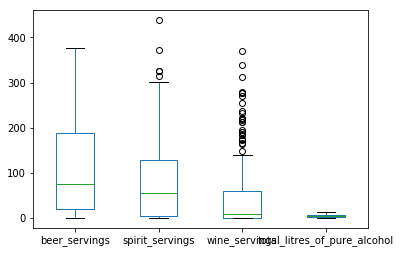

In [12]:
drinks.plot(kind='box')

According to statistical definition, all of the little circles are outliers. There is no catch all way to do outliers in Pandas. A machine learning approach or hard code some rules, and some filter conditions, for what counts as an outlier is the best approach

###### Q5 - How does Pandas datastructures compare to R df's?

###### DataFrame Differences
Pandas df's and R df's are very similar. However, the biggest difference between the two is that in R, you are discouraged from storing useful data in the row names. In R, the idea is that you store all the useful data as columns
Pandas df's have an index and they look like row names. In Pandas, the index is required, there is no way not to have an index and no one will ever discourage you from storing useful data in the index. Actually, putting something useful and unique in the index is a good way to use it because it allows you to reference those rows using the row names 

###### Series Differences
Not too many that he could think of

###### Q6 - Q6 - For filtering rows, you sometimes use the syntax df[row filter criteria] and sometimes you use df.loc[row, column]. 
Is there any difference in performance or some other reason why you use the different approaches?
Scenario - Say we wanted to see all the movies with a duration of 200 minutes plus...

In [13]:
movies[movies.duration >= 200] # This is one way to do it

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [14]:
movies.loc[movies.duration >= 200, :]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


###### Why do you do one versus the other?
KM teaches the first one because it is what most people use and so you need to understand that code. You need to recognise it and know what's going on. He teaches .loc because it is super powerful and you need to know how to use .loc. (Everyone should write their code using .loc.) However, the first one does look cleaner and is easier to read and less typing. You can use either as there is little to no difference between them

In [15]:
movies.loc[movies.duration >= 200, ['genre']] # This works as well for a single column instead of all of them

,genre
2,Crime
7,Adventure
17,Drama
78,Crime
85,Adventure
142,Adventure
157,Drama
204,Adventure
445,Adventure
476,Drama


Why do you do one versus the other?

In [16]:
movies[movies.duration >= 200].genre

2          Crime
7      Adventure
17         Drama
78         Crime
85     Adventure
142    Adventure
157        Drama
204    Adventure
445    Adventure
476        Drama
630    Biography
767       Action
Name: genre, dtype: object

KM would never use the first and always use the second. The reason being the SettingWithCopyWarning that you will see on occasion.
You get the error if you try to assign something to the first because it is two operations whereas the second one is just one operation and Pandas can handle it much better

###### Q12 - What is the best way to get value_count, value_count(normalise) and column totals in the same dataframe?

In [17]:
drinks.continent.value_counts() # This is a tally of how many of those entries exist

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [18]:
drinks.continent.value_counts(normalize = True) # This is value_counts normalised ie what percentage is Africa, Europe etc

Africa           0.274611
Europe           0.233161
Asia             0.227979
North America    0.119171
Oceania          0.082902
South America    0.062176
Name: continent, dtype: float64

In [19]:
drinks.sum(axis=0) # This is the column totals

country                         AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer_servings                                                               20489
spirit_servings                                                             15632
wine_servings                                                                9544
total_litres_of_pure_alcohol                                                910.4
continent                       AsiaEuropeAfricaEuropeAfricaNorth AmericaSouth...
dtype: object

In [20]:
drinks.sum(axis=1) # These are the row totals

0        0.0
1      279.9
2       39.7
3      707.4
4      324.9
5      279.9
6      447.3
7      214.8
8      555.4
9      554.7
10      73.3
11     355.3
12     114.0
13       0.0
14     358.3
15     571.4
16     601.5
17     391.8
18      52.1
19      23.4
20     219.8
21     261.6
22     248.4
23     413.2
24      34.6
25     587.3
26      43.3
27      94.3
28      49.0
29     220.0
       ...  
163    318.6
164     98.7
165    405.2
166    575.2
167     57.0
168     17.3
169    364.4
170    222.9
171      6.1
172     58.3
173     63.1
174    366.4
175     75.3
176     81.4
177    124.2
178     57.0
179     62.3
180    496.9
181    158.8
182    550.4
183     48.7
184    499.7
185    376.6
186    136.4
187     50.9
188    443.7
189    116.0
190      6.1
191     57.5
192     90.7
Length: 193, dtype: float64

In [21]:
a = drinks.continent.value_counts()

In [22]:
b = drinks.continent.value_counts(normalize = True)

In [23]:
pd.concat([a, b], axis=1)

,continent,continent
Africa,53,0.274611
Europe,45,0.233161
Asia,44,0.227979
North America,23,0.119171
Oceania,16,0.082902
South America,12,0.062176


We can concat these two series into the same df because they share the same index but it is not possible to get all four into the same df as they do not all have something in common that you can use to join them.

The first two share the same index and therefore it is easy to concat them

###### Q13 - What's the best way to convert non-numerical data from multiple columns in a df to numerical form for machine learning purposes?

In [24]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [25]:
drinks['beer'] = drinks.beer_servings.astype(str) # To convert the beer servings columns ro a string and save it in a new column

In [26]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer
0,Afghanistan,0,0,0,0.0,Asia,0
1,Albania,89,132,54,4.9,Europe,89
2,Algeria,25,0,14,0.7,Africa,25
3,Andorra,245,138,312,12.4,Europe,245
4,Angola,217,57,45,5.9,Africa,217


In [27]:
drinks.dtypes # we can see that it is in fact a string object

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
dtype: object

In [28]:
drinks.beer.astype(int) # This is how we convert it back to an integer column. We could have used float here too

0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer, Length: 193, dtype: int32

In [29]:
drinks.dtypes # For some reason, this still says that it is an object ie a string

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
beer                             object
dtype: object

###### Q14 - vlookup in Excel, can this be done in Pandas?

In [30]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [31]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

###### Scenario - I want to define a mapping where you can specify text for each content rating. 
With the vlookup, everytime there is an R, there will be a column that says no etc for the different ratings (this is what vlookup does conceptually)

In [32]:
mapping = {'R':'no', 'PG-13':'yes', 'PG':'yes'} # This is our mapping

In [33]:
movies.content_rating.map(mapping)

0       no
1       no
2       no
3      yes
4       no
5      NaN
6      NaN
7      yes
8       no
9       no
10     yes
11     yes
12     yes
13     yes
14     yes
15     yes
16      no
17     NaN
18      no
19     yes
20      no
21      no
22     NaN
23      no
24      no
25     yes
26     yes
27      no
28      no
29     NaN
      ... 
949    yes
950     no
951     no
952     no
953    yes
954    yes
955     no
956    yes
957     no
958    yes
959     no
960    yes
961     no
962    yes
963     no
964    yes
965    yes
966    yes
967     no
968     no
969     no
970     no
971     no
972    NaN
973    yes
974    yes
975    yes
976    yes
977    yes
978     no
Name: content_rating, Length: 979, dtype: object

In [34]:
movies['Kids Allowed'] = movies.content_rating.map(mapping) # Turns our filter into a new column in the df

In [35]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,Kids Allowed
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",no
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",no
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",no
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",yes
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",no


###### Q18 - Removing the last 30 rows of the df

In [36]:
ufo.shape

(18241, 5)

In [37]:
ufo

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00
5,Valley City,NaN,DISK,ND,1934-09-15 15:30:00
6,Crater Lake,NaN,CIRCLE,CA,1935-06-15 00:00:00
7,Alma,NaN,DISK,MI,1936-07-15 00:00:00
8,Eklutna,NaN,CIGAR,AK,1936-10-15 17:00:00
9,Hubbard,NaN,CYLINDER,OR,1937-06-15 00:00:00


In [38]:
ufo.iloc[:-30, :].shape

(18211, 5)

We can see what the original shape of the df is. When we apply the iloc command, we can see that it has cut off the last 30 rows. (To make this permanent we just need the inplace = True argument.)

###### Q19 - Making a year/Month column from the datetime column

In [39]:
ufo.dtypes # We see that the Time column is indeed a datetime column

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [41]:
ufo.Time.dt.year # That means we can pull out things like just the year

0        1930
1        1930
2        1931
3        1931
4        1933
5        1934
6        1935
7        1936
8        1936
9        1937
10       1937
11       1939
12       1939
13       1939
14       1941
15       1941
16       1942
17       1942
18       1942
19       1943
20       1943
21       1943
22       1943
23       1943
24       1944
25       1944
26       1944
27       1944
28       1944
29       1944
         ... 
18211    2000
18212    2000
18213    2000
18214    2000
18215    2000
18216    2000
18217    2000
18218    2000
18219    2000
18220    2000
18221    2000
18222    2000
18223    2000
18224    2000
18225    2000
18226    2000
18227    2000
18228    2000
18229    2000
18230    2000
18231    2000
18232    2000
18233    2000
18234    2000
18235    2000
18236    2000
18237    2000
18238    2000
18239    2000
18240    2000
Name: Time, Length: 18241, dtype: int64

dt is how you access the datetime options

In [42]:
ufo['year'] = ufo.Time.dt.year.astype(str) # We are going to convert that to a string and store it in a new column called year

In [43]:
ufo.Time.dt.month

0         6
1         6
2         2
3         6
4         4
5         9
6         6
7         7
8        10
9         6
10        8
11        6
12        6
13        7
14        6
15        7
16        2
17        6
18        7
19        4
20        6
21        8
22        8
23       10
24        1
25        1
26        1
27        4
28        6
29        6
         ..
18211    12
18212    12
18213    12
18214    12
18215    12
18216    12
18217    12
18218    12
18219    12
18220    12
18221    12
18222    12
18223    12
18224    12
18225    12
18226    12
18227    12
18228    12
18229    12
18230    12
18231    12
18232    12
18233    12
18234    12
18235    12
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: int64

In [44]:
ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0') # Our series looks like this

0        06
1        06
2        02
3        06
4        04
5        09
6        06
7        07
8        10
9        06
10       08
11       06
12       06
13       07
14       06
15       07
16       02
17       06
18       07
19       04
20       06
21       08
22       08
23       10
24       01
25       01
26       01
27       04
28       06
29       06
         ..
18211    12
18212    12
18213    12
18214    12
18215    12
18216    12
18217    12
18218    12
18219    12
18220    12
18221    12
18222    12
18223    12
18224    12
18225    12
18226    12
18227    12
18228    12
18229    12
18230    12
18231    12
18232    12
18233    12
18234    12
18235    12
18236    12
18237    12
18238    12
18239    12
18240    12
Name: Time, Length: 18241, dtype: object

First we pull out the time series, then we pulled out the month attribute, we then forced it to a string, then we use the string method pad and we pad with a zero rather than a space

In [46]:
ufo['month'] = ufo.Time.dt.month.astype(str).str.pad(width=2, fillchar='0') # We create a new column for the month

In [47]:
ufo.year.str.cat(ufo.month, sep='-') # Finally, we get the month and the year columns into one

0        1930-06
1        1930-06
2        1931-02
3        1931-06
4        1933-04
5        1934-09
6        1935-06
7        1936-07
8        1936-10
9        1937-06
10       1937-08
11       1939-06
12       1939-06
13       1939-07
14       1941-06
15       1941-07
16       1942-02
17       1942-06
18       1942-07
19       1943-04
20       1943-06
21       1943-08
22       1943-08
23       1943-10
24       1944-01
25       1944-01
26       1944-01
27       1944-04
28       1944-06
29       1944-06
          ...   
18211    2000-12
18212    2000-12
18213    2000-12
18214    2000-12
18215    2000-12
18216    2000-12
18217    2000-12
18218    2000-12
18219    2000-12
18220    2000-12
18221    2000-12
18222    2000-12
18223    2000-12
18224    2000-12
18225    2000-12
18226    2000-12
18227    2000-12
18228    2000-12
18229    2000-12
18230    2000-12
18231    2000-12
18232    2000-12
18233    2000-12
18234    2000-12
18235    2000-12
18236    2000-12
18237    2000-12
18238    2000-

We take the year, concatenate it with the month and separate them with a dash

In [48]:
ufo['new'] = ufo.year.str.cat(ufo.month, sep='-') # Putting it all together

In [49]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year,month,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04,1933-04


###### Q20 - How to create a new column(s), based on pre-existing columns, in a nested for loop
If you want to do this with a for loop then the answer is, don't do this with a for loop! You rarely need to use a for loop in Pandas.

###### Scenario - Sex is equal to male and age is less than 30
we want to create a column that encompasses this demographic (where both of these conditions are met)

In [51]:
train['Young_Males'] =((train.Sex == 'male') & (train.Age < 30)).map({True: 'yes', False:'no'})

In [53]:
train.head() # We can see the result of the new column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Young_Males
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,no
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,no
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,no
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,no


No requirement there for an if statement or a for loop. You just need to write conditions that output Trues/Falses and then mapt them to different outputs eg 1's and 0's instead of True/False etc

###### Q22 - How to find the top repeating number from an array with their frequency

In [55]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

###### Q23 - How can I fill NA based on a condition
Scenario - I wanna fill NA for all missing cities in the UFO dataset but only where the colour is red

In [56]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,year,month,new
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930,06,1930-06
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930,06,1930-06
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931,02,1931-02
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931,06,1931-06
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933,04,1933-04


In [58]:
ufo.City.isnull().sum() # Tells us that there are 25 rows where the City data is missing

25

In [59]:
ufo.loc[(ufo.City.isnull()) & (ufo['Colors Reported'] == 'RED'), :]

,City,Colors Reported,Shape Reported,State,Time,year,month,new
3123,NaN,RED,TRIANGLE,WV,1975-11-25 23:00:00,1975,11,1975-11
12441,NaN,RED,FIREBALL,WA,1998-10-26 17:58:00,1998,10,1998-10


This shows us all the rows that match our two conditions

To replace the NaN's with a value...

In [60]:
ufo.loc[(ufo.City.isnull()) & (ufo['Colors Reported'] == 'RED'), 'City'] = 'RFH'

In [61]:
ufo.iloc[3123]

City                               RFH
Colors Reported                    RED
Shape Reported                TRIANGLE
State                               WV
Time               1975-11-25 23:00:00
year                              1975
month                               11
new                            1975-11
Name: 3123, dtype: object